In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # Using petal length and width for 2D visualization
y = iris.target

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models with random_state for reproducibility
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
adaboost_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

# Perform cross-validation for each model
tree_cv_accuracy = cross_val_score(tree_clf, X, y, cv=cv, scoring='accuracy').mean()
bagging_cv_accuracy = cross_val_score(bagging_clf, X, y, cv=cv, scoring='accuracy').mean()
rf_cv_accuracy = cross_val_score(rf_clf, X, y, cv=cv, scoring='accuracy').mean()
adaboost_cv_accuracy = cross_val_score(adaboost_clf, X, y, cv=cv, scoring='accuracy').mean()
gb_cv_accuracy = cross_val_score(gb_clf, X, y, cv=cv, scoring='accuracy').mean()

# Print cross-validation results
print(f"Decision Tree CV Accuracy: {tree_cv_accuracy:.4f}")
print(f"Bagging CV Accuracy: {bagging_cv_accuracy:.4f}")
print(f"Random Forest CV Accuracy: {rf_cv_accuracy:.4f}")
print(f"AdaBoost CV Accuracy: {adaboost_cv_accuracy:.4f}")
print(f"Gradient Boosting CV Accuracy: {gb_cv_accuracy:.4f}")

Decision Tree CV Accuracy: 0.9600
Bagging CV Accuracy: 0.9667
Random Forest CV Accuracy: 0.9667
AdaBoost CV Accuracy: 0.9600
Gradient Boosting CV Accuracy: 0.9533


The Decision Tree has slightly lower accuracy compared to the ensemble methods.
Both Bagging and Random Forest provide similar accuracy, which is slightly higher than the base model.
AdaBoost also perform similarly but with more focus on correcting misclassified instances, slightly improving accuracy over the base model.

# Visualizing Decision Boundaries:

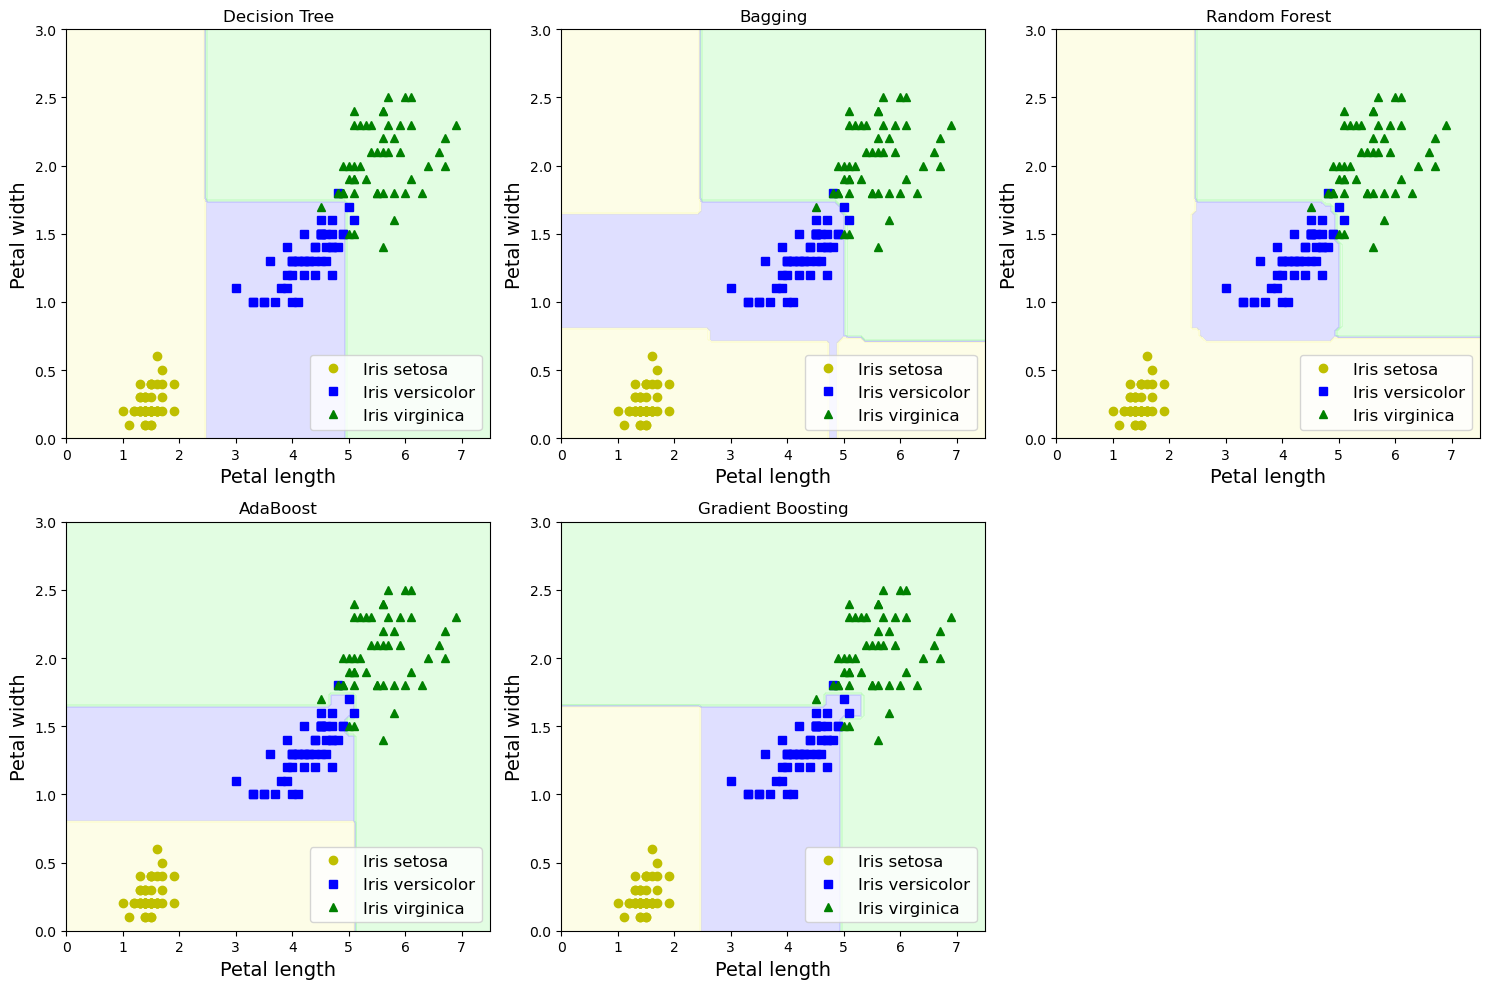

In [7]:
# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
        plt.legend(loc="lower right", fontsize=12)

# Train and plot decision boundaries for each model
models = {
    "Decision Tree": tree_clf,
    "Bagging": bagging_clf,
    "Random Forest": rf_clf,
    "AdaBoost": adaboost_clf,
    "Gradient Boosting": gb_clf
}

plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items(), 1):
    # Train the model
    model.fit(X, y)
    
    # Plot decision boundary
    plt.subplot(2, 3, i)
    plot_decision_boundary(model, X, y)
    plt.title(f"{name}")

plt.tight_layout()
plt.show()

Bagging and Random Forest improve the stability and performance of the base Decision Tree by reducing variance.
AdaBoost and Gradient Boosting focus on correcting errors, resulting in more complex boundaries and a slight performance boost.
Ensemble techniques generally improve the performance of the Decision Tree, making the model more robust to variations in the data.